<a href="https://colab.research.google.com/github/ShehryarAmir/TheSparksFoundation-Tasks/blob/main/Prediciton_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author  : Shehryar Aamer

# Step 1 : To predict the optimum number of clusters for the Iris dataset,
we can use a method called "elbow method." The elbow method involves fitting a model to the data with a range of different numbers of clusters and then calculating the within-cluster sum of squared errors (WCSS). The WCSS is the sum of the squared distance between each point and the centroid of its assigned cluster.

To implement the elbow method, I have followed these steps:



1.   Load the Iris dataset and extract the features and labels.
2.   Show the first and last 5 rows of dataset.
3.   Draw a pairplot
4.   Scale the features using StandardScaler.
5.   Create a range of values for the number of clusters (e.g. from 1 to 10).
6.   For each value in the range of clusters, fit a K-Means model to the scaled data and calculate the WCSS.
7. Plot the WCSS values against the number of clusters.










The optimum number of clusters is typically the value where the WCSS begins to level off and form an "elbow." This point is where adding more clusters no longer significantly decreases the WCSS.






In [ ]:
# import libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# first and last 5 rows of dataset
df = pd.DataFrame(iris['data'], columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df.head()



,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.tail()

,sepal length,sepal width,petal length,petal width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Drawing a pairplot using seaborn

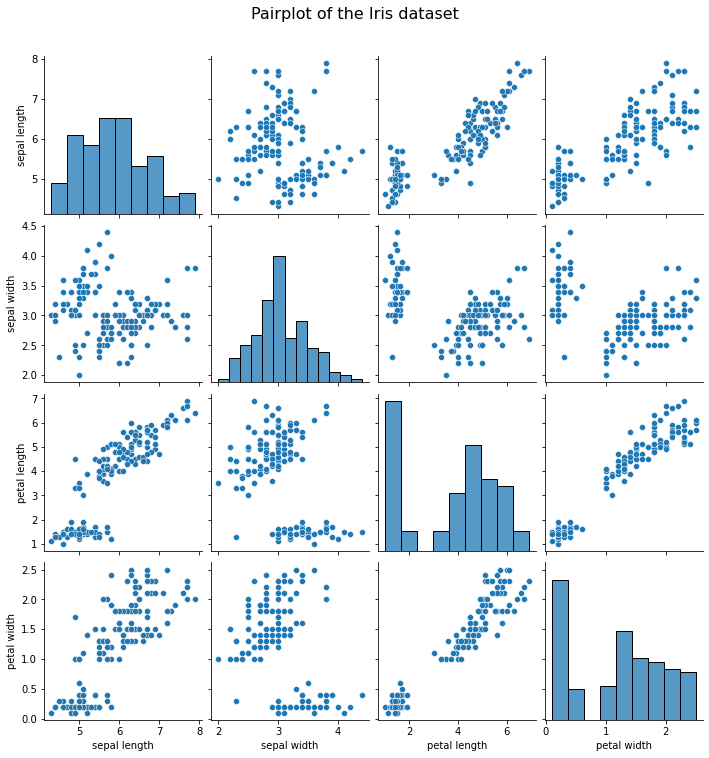

In [ ]:
# pairplot
sns.pairplot(df)

# Add meaningful titles
plt.suptitle("Pairplot of the Iris dataset", y=1.05, fontsize=16)
plt.show()

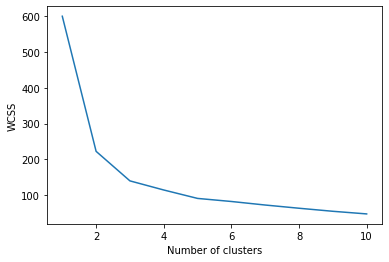

In [ ]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create a range of values for the number of clusters
k_values = range(1, 11)

# fit K-Means models and calculate WCSS for each number of clusters
wcss = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    wcss.append(model.inertia_)

# plot the WCSS values against the number of clusters
plt.plot(k_values, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Plot showing the WCSS values for each number of clusters. The optimum number of clusters can then be determined by identifying the "elbow" point on the plot.

# Step 2 :  To apply K-Means clustering to the Iris dataset,I followed the steps:

1. Create a KMeans model with the determined number of clusters.
2. Fit the model to the scaled data.
3. Extract the labels for each data point and the centroids of the clusters.

In [ ]:
# create a KMeans model with the determined number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

# fit the model to the scaled data
kmeans.fit(X_scaled)

# extract the labels for each data point and the centroids of the clusters
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 3 : To plot the centroids of the clusters obtained from K-Means clustering:

1. Extract the centroids of the clusters from the KMeans model.
2. Select the features that you want to use for the plot (e.g. the first two features).
3. Create a scatter plot of the data points, coloring the points according to their cluster label.
4. Overlay the centroids on top of the scatter plot as separate points.

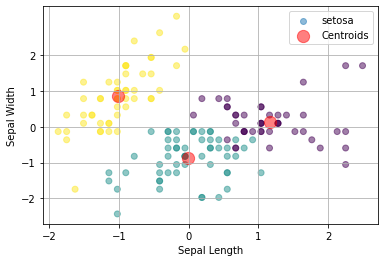

In [ ]:
# select the features that you want to use for the plot (e.g. the first two features)
x = X_scaled[:, 0]
y = X_scaled[:, 1]

# create a scatter plot of the data points, coloring the points according to their cluster label
plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.5)

# overlay the centroids on top of the scatter plot as separate points
plt.scatter(centroids[:, 0], centroids[:, 1], c='Red', s=150, alpha=0.5)

# add a legend to the plot
plt.legend(['setosa', 'Centroids'])

# add gridlines and customize the axis labels and tick marks
plt.grid()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xticks(range(-2, 3))
plt.yticks(range(-2, 3))

plt.show()

This will create a scatter plot of the data points, with the points colored according to their cluster label, and the centroids overlaid on top of the plot as separate points.

# Step 4 : Training of model

split the data into training and test sets, train a decision tree model on the training set, and evaluate the model's accuracy on the test set.

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Test the model on the test set
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 1.0


Acurracy 1.0 is 100%



To improve the model's performance, you can try tuning the hyperparameters of the decision tree, such as the maximum depth of the tree or the minimum number of samples required to split a node. You can also try using different evaluation metrics, such as precision or recall, to assess the model's performance.

# Step 5: Plot of the decision tree, 
showing the structure of the tree and the decision rules at each node. The x-axis represents the feature values, and the y-axis represents the decision tree depth. The plot will also show the class labels for each leaf node.

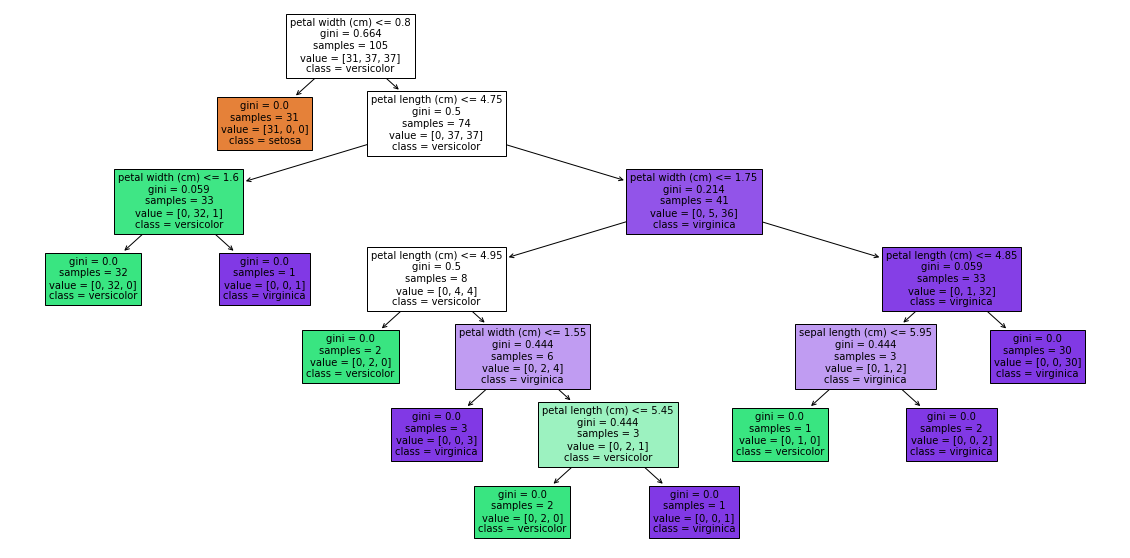

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=iris['feature_names'], class_names=iris['target_names'],
               filled=True, fontsize=10)
plt.show()

# Step 6 : To compare the actual and predicted flower classifications for the Iris dataset

In [ ]:
# Predict the classes for the test set
y_pred = clf.predict(X_test)

# Compare the actual and predicted classes
for actual, predicted in zip(y_test, y_pred):
    print(f'Actual: {actual}, Predicted: {predicted}')

Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 1, Predi

If you want to see how well the model is performing overall, you can calculate evaluation metrics such as accuracy, precision, and recall. You can use the scikit-learn library to calculate these metrics:

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
